#🛠️ Preparação dos Dados

In [185]:
import pandas as pd


In [186]:
dados = pd.read_csv('/content/dados_tratados.csv')

In [187]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Qtd_Servicos
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.155236,3
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.967967,1
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.427926,0
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.219713,3
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.756468,2


In [188]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [189]:
dados['Partner'] = dados['Partner'].replace({'No': 0, 'Yes': 1})
dados['PaperlessBilling'] = dados['PaperlessBilling'].replace({'No': 0, 'Yes': 1})
dados['Dependents'] = dados['Dependents'].replace({'No': 0, 'Yes': 1})
dados['PhoneService'] = dados['PhoneService'].replace({'No': 0, 'Yes': 1})
dados['MultipleLines'] = dados['MultipleLines'].replace({'No': 0, 'Yes': 1, 'No phone service': 2})
dados['OnlineSecurity'] = dados['OnlineSecurity'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
dados['OnlineBackup'] = dados['OnlineBackup'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
dados['DeviceProtection'] = dados['DeviceProtection'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
dados['TechSupport'] = dados['TechSupport'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
dados['StreamingTV'] = dados['StreamingTV'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
dados['StreamingMovies'] = dados['StreamingMovies'].replace({'No': 0, 'Yes': 1, 'No internet service': 2})
dados['Churn'] = dados['Churn'].replace({'No': 0, 'Yes': 1})
dados['gender'] = dados['gender'].replace({'Female': 0, 'Male': 1})
dados['InternetService'] = dados['InternetService'].replace({'No': 0, 'DSL': 1, 'Fiber optic': 2})
dados['Contract'] = dados['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
dados['PaymentMethod'] = dados['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})



/tmp/ipython-input-852123515.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-852123515.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-852123515.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-852123515.py:4: FutureWarning:

Downcastin

In [190]:
dados = dados.apply(pd.to_numeric, errors='ignore')


/tmp/ipython-input-2457015688.py:1: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead



In [191]:
colunas_convertidas = [
    'Partner', 'PaperlessBilling', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Churn', 'gender', 'InternetService',
    'Contract', 'PaymentMethod'
]

dados[colunas_convertidas] = dados[colunas_convertidas].astype(int)


In [192]:
print(dados.dtypes)


customerID           object
Churn                 int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
Charges.Monthly     float64
Charges.Total       float64
Contas_Diarias      float64
Qtd_Servicos          int64
dtype: object


In [193]:
import plotly.express as px

In [194]:
px.histogram(dados, x='Churn', color='Churn', text_auto=True,
             color_discrete_map={0: '#00CC96', 1: '#EF553B'})


In [195]:
px.histogram(dados, x = 'Qtd_Servicos', text_auto = True, color = 'Churn', barmode = 'group')

In [196]:
px.histogram(dados, x = 'gender', text_auto = True, color = 'Churn', barmode = 'group')

In [197]:
px.histogram(dados, x = 'Contract', text_auto = True, color = 'Churn', barmode = 'group')

In [198]:
dados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Qtd_Servicos
0,0002-ORFBO,0,0,0,1,1,9,1,0,1,...,1,1,0,1,1,1,65.60,593.30,2.155236,3
1,0003-MKNFE,0,1,0,0,0,9,1,1,1,...,0,0,1,0,0,1,59.90,542.40,1.967967,1
2,0004-TLHLJ,1,1,0,0,0,4,1,0,2,...,0,0,0,0,1,0,73.90,280.85,2.427926,0
3,0011-IGKFF,1,1,1,1,0,13,1,0,2,...,0,1,1,0,1,0,98.00,1237.85,3.219713,3
4,0013-EXCHZ,1,0,1,1,0,3,1,0,2,...,1,1,0,0,1,1,83.90,267.40,2.756468,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,0,0,0,0,13,1,0,1,...,1,0,0,1,0,1,55.15,742.90,1.811910,2
7039,9992-RRAMN,1,1,0,1,0,22,1,1,2,...,0,0,1,0,1,0,85.10,1873.70,2.795893,1
7040,9992-UJOEL,0,1,0,0,0,2,1,0,1,...,0,0,0,0,1,1,50.30,92.75,1.652567,1
7041,9993-LHIEB,0,1,0,1,1,67,1,0,1,...,1,0,1,2,0,1,67.85,4627.65,2.229158,3


In [199]:
df_clean = dados.drop(['customerID'], axis=1)
df_clean.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Qtd_Servicos
0,0,0,0,1,1,9,1,0,1,0,...,1,1,0,1,1,1,65.6,593.30,2.155236,3
1,0,1,0,0,0,9,1,1,1,0,...,0,0,1,0,0,1,59.9,542.40,1.967967,1
2,1,1,0,0,0,4,1,0,2,0,...,0,0,0,0,1,0,73.9,280.85,2.427926,0
3,1,1,1,1,0,13,1,0,2,0,...,0,1,1,0,1,0,98.0,1237.85,3.219713,3
4,1,0,1,1,0,3,1,0,2,0,...,1,1,0,0,1,1,83.9,267.40,2.756468,2


In [200]:
x = df_clean.drop('Churn', axis = 1)
y = df_clean['Churn']

In [201]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Qtd_Servicos
0,0,0,1,1,9,1,0,1,0,1,...,1,1,0,1,1,1,65.60,593.30,2.155236,3
1,1,0,0,0,9,1,1,1,0,0,...,0,0,1,0,0,1,59.90,542.40,1.967967,1
2,1,0,0,0,4,1,0,2,0,0,...,0,0,0,0,1,0,73.90,280.85,2.427926,0
3,1,1,1,0,13,1,0,2,0,1,...,0,1,1,0,1,0,98.00,1237.85,3.219713,3
4,0,1,1,0,3,1,0,2,0,0,...,1,1,0,0,1,1,83.90,267.40,2.756468,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,13,1,0,1,1,0,...,1,0,0,1,0,1,55.15,742.90,1.811910,2
7039,1,0,1,0,22,1,1,2,0,0,...,0,0,1,0,1,0,85.10,1873.70,2.795893,1
7040,1,0,0,0,2,1,0,1,0,1,...,0,0,0,0,1,1,50.30,92.75,1.652567,1
7041,1,0,1,1,67,1,0,1,1,0,...,1,0,1,2,0,1,67.85,4627.65,2.229158,3


In [202]:
y

,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [203]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [204]:
colunas = x.columns


In [205]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [206]:
x = one_hot.fit_transform(x)

In [207]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__gender_1', 'onehotencoder__Partner_1',
       'onehotencoder__Dependents_1', 'onehotencoder__PhoneService_1',
       'onehotencoder__MultipleLines_0', 'onehotencoder__MultipleLines_1',
       'onehotencoder__MultipleLines_2',
       'onehotencoder__InternetService_0',
       'onehotencoder__InternetService_1',
       'onehotencoder__InternetService_2',
       'onehotencoder__OnlineSecurity_0',
       'onehotencoder__OnlineSecurity_1',
       'onehotencoder__OnlineSecurity_2', 'onehotencoder__OnlineBackup_0',
       'onehotencoder__OnlineBackup_1', 'onehotencoder__OnlineBackup_2',
       'onehotencoder__DeviceProtection_0',
       'onehotencoder__DeviceProtection_1',
       'onehotencoder__DeviceProtection_2',
       'onehotencoder__TechSupport_0', 'onehotencoder__TechSupport_1',
       'onehotencoder__TechSupport_2', 'onehotencoder__StreamingTV_0',
       'onehotencoder__StreamingTV_1', 'onehotencoder__StreamingTV_2',
       'onehotencoder__StreamingMovies_0',
  

In [208]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__gender_1,onehotencoder__Partner_1,onehotencoder__Dependents_1,onehotencoder__PhoneService_1,onehotencoder__MultipleLines_0,onehotencoder__MultipleLines_1,onehotencoder__MultipleLines_2,onehotencoder__InternetService_0,onehotencoder__InternetService_1,onehotencoder__InternetService_2,...,onehotencoder__PaymentMethod_0,onehotencoder__PaymentMethod_1,onehotencoder__PaymentMethod_2,onehotencoder__PaymentMethod_3,remainder__SeniorCitizen,remainder__tenure,remainder__Charges.Monthly,remainder__Charges.Total,remainder__Contas_Diarias,remainder__Qtd_Servicos
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,65.60,593.30,2.155236,3.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,9.0,59.90,542.40,1.967967,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,4.0,73.90,280.85,2.427926,0.0
3,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,13.0,98.00,1237.85,3.219713,3.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,3.0,83.90,267.40,2.756468,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,13.0,55.15,742.90,1.811910,2.0
7039,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,22.0,85.10,1873.70,2.795893,1.0
7040,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,50.30,92.75,1.652567,1.0
7041,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,67.0,67.85,4627.65,2.229158,3.0


In [209]:
from sklearn.preprocessing import LabelEncoder

In [210]:
label_ecoder = LabelEncoder()

In [211]:
y = label_ecoder.fit_transform(y)

In [212]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [213]:
x

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.93300000e+02, 2.15523614e+00, 3.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.42400000e+02, 1.96796715e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.80850000e+02, 2.42792608e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.27500000e+01, 1.65256674e+00, 1.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.62765000e+03, 2.22915811e+00, 3.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.70760000e+03, 1.93839836e+00, 4.00000000e+00]])

In [214]:
print(df_clean['Churn'].unique())

[0 1]


In [215]:
print(df_clean['Churn'].value_counts())
print(df_clean['Churn'].dtype)

Churn
0    5174
1    1869
Name: count, dtype: int64
int64


In [216]:
import numpy as np

df_clean['Churn'] = df_clean['Churn'].replace('', np.nan)

In [217]:
print(df_clean['Churn'].isna().sum())

0


In [218]:
df_clean = df_clean.dropna(subset=['Churn'])

In [219]:
df_clean['Churn'] = df_clean['Churn'].astype(int)

In [220]:
print(df_clean['gender'].unique())

[0 1]


In [221]:
print(df_clean['gender'].value_counts())
print(df_clean['gender'].dtype)

gender
1    3555
0    3488
Name: count, dtype: int64
int64


In [222]:
proporcao_churn = df_clean['Churn'].value_counts(normalize=True) * 100

print(proporcao_churn)


Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


In [223]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

In [224]:
colunas_categoricas = X.select_dtypes(include='object').columns
print(colunas_categoricas)


Index([], dtype='object')


In [225]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [226]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter


In [227]:
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']


In [228]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, test_size=0.3, random_state=42)


In [229]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputado = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)


In [230]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_imputado, y_train)


In [231]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [232]:
y_test.head()

,Churn
4839,1
6844,0
648,1
413,0
992,0


In [233]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Qtd_Servicos
5609,1,0,0,0,14,1,0,2,0,0,...,0,0,0,0,0,0,76.45,1117.55,2.511704,0
2209,1,0,0,0,5,1,0,1,0,0,...,0,1,1,1,1,1,70.00,347.40,2.299795,2
6919,1,0,1,0,35,1,1,2,0,0,...,0,0,0,0,1,0,75.20,2576.20,2.470637,0
2284,1,0,1,0,58,1,1,1,1,1,...,0,1,1,2,1,0,86.10,4890.50,2.828747,4
845,0,0,0,0,2,1,0,1,0,1,...,0,0,0,0,1,1,49.60,114.70,1.629569,1


In [234]:
import pandas as pd

X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)


X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [235]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [236]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)


In [237]:
X_test_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Qtd_Servicos
0,-1.020080,2.284053,1.039312,-0.659400,1.442456,0.314991,0.611172,0.986498,-0.900119,0.289534,...,-0.910322,-1.072540,0.234811,-0.834015,0.816497,0.586128,0.812680,1.670311,0.812680,0.194674
1,0.980315,-0.437818,1.039312,1.516531,0.344561,0.314991,-0.932413,-0.295377,0.355565,0.289534,...,-0.910322,-1.072540,-1.080666,0.365779,0.816497,0.586128,-0.159646,0.087620,-0.159646,0.194674
2,-1.020080,-0.437818,-0.962175,-0.659400,-1.037972,0.314991,-0.932413,0.986498,-0.900119,-0.995257,...,-0.910322,0.239851,-1.080666,-0.834015,0.816497,-0.283975,0.504058,-0.780949,0.504058,-0.448585
3,-1.020080,-0.437818,1.039312,1.516531,1.523781,0.314991,-0.932413,-1.577253,1.611248,1.574326,...,1.606721,1.552242,1.550288,1.565574,0.816497,-0.283975,-1.523557,-0.398133,-1.523557,-1.091845
4,-1.020080,-0.437818,-0.962175,-0.659400,-0.793996,-3.174689,2.154758,-0.295377,-0.900119,0.289534,...,-0.910322,-1.072540,-1.080666,-0.834015,-1.224745,-1.154077,-1.193364,-0.855154,-1.193364,-0.448585


In [238]:
X_train_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Qtd_Servicos
0,0.980315,-0.437818,-0.962175,-0.6594,-0.753333,0.314991,-0.932413,0.986498,-0.900119,-0.995257,...,-0.910322,-1.072540,-1.080666,-0.834015,-1.224745,-1.154077,0.376295,-0.522361,0.376295,-1.091845
1,0.980315,-0.437818,-0.962175,-0.6594,-1.119298,0.314991,-0.932413,-0.295377,-0.900119,-0.995257,...,-0.910322,0.239851,0.234811,0.365779,0.816497,-0.283975,0.162251,-0.859421,0.162251,0.194674
2,0.980315,-0.437818,1.039312,-0.6594,0.100585,0.314991,0.611172,0.986498,-0.900119,-0.995257,...,-0.910322,-1.072540,-1.080666,-0.834015,0.816497,-1.154077,0.334814,0.116024,0.334814,-1.091845
3,0.980315,-0.437818,1.039312,-0.6594,1.035828,0.314991,0.611172,-0.295377,0.355565,0.289534,...,-0.910322,0.239851,0.234811,1.565574,0.816497,-1.154077,0.696532,1.128888,0.696532,1.481193
4,-1.020080,-0.437818,-0.962175,-0.6594,-1.241286,0.314991,-0.932413,-0.295377,-0.900119,0.289534,...,-0.910322,-1.072540,-1.080666,-0.834015,0.816497,-0.283975,-0.514727,-0.961263,-0.514727,-0.448585


In [239]:
df_clean.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Qtd_Servicos
0,0,0,0,1,1,9,1,0,1,0,...,1,1,0,1,1,1,65.6,593.30,2.155236,3
1,0,1,0,0,0,9,1,1,1,0,...,0,0,1,0,0,1,59.9,542.40,1.967967,1
2,1,1,0,0,0,4,1,0,2,0,...,0,0,0,0,1,0,73.9,280.85,2.427926,0
3,1,1,1,1,0,13,1,0,2,0,...,0,1,1,0,1,0,98.0,1237.85,3.219713,3
4,1,0,1,1,0,3,1,0,2,0,...,1,1,0,0,1,1,83.9,267.40,2.756468,2


#🎯 Correlação e Seleção de Variáveis

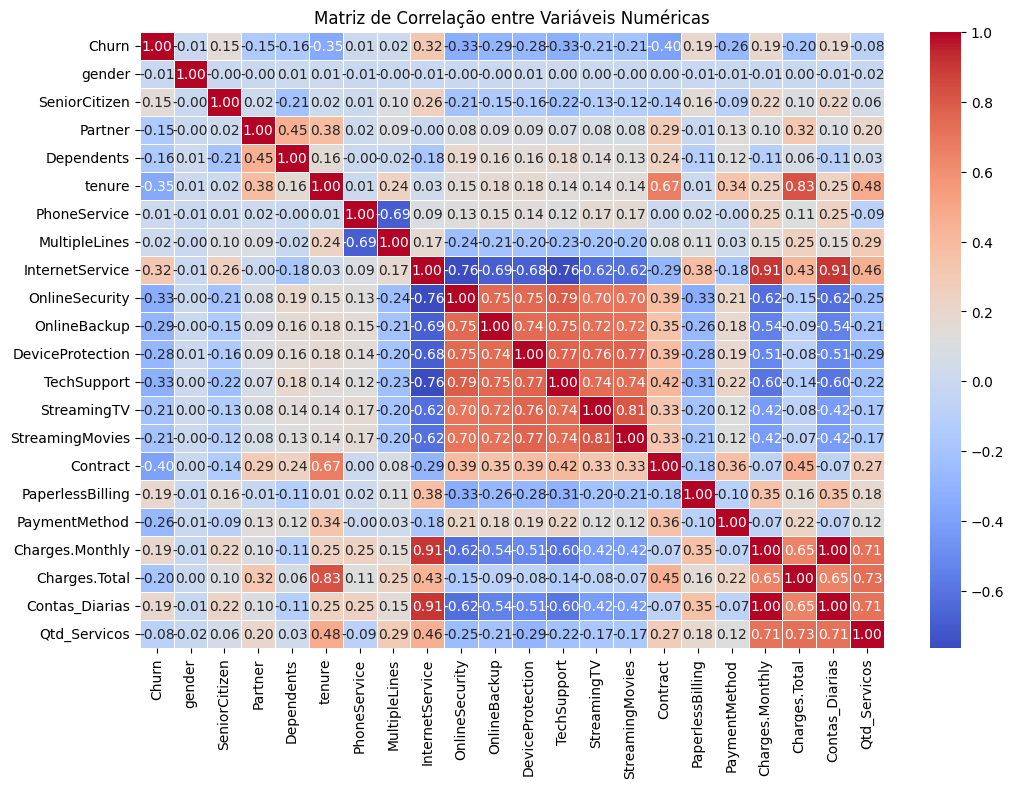

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt


dados_numericos = df_clean.select_dtypes(include=['int64', 'float64'])


correlacao = dados_numericos.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


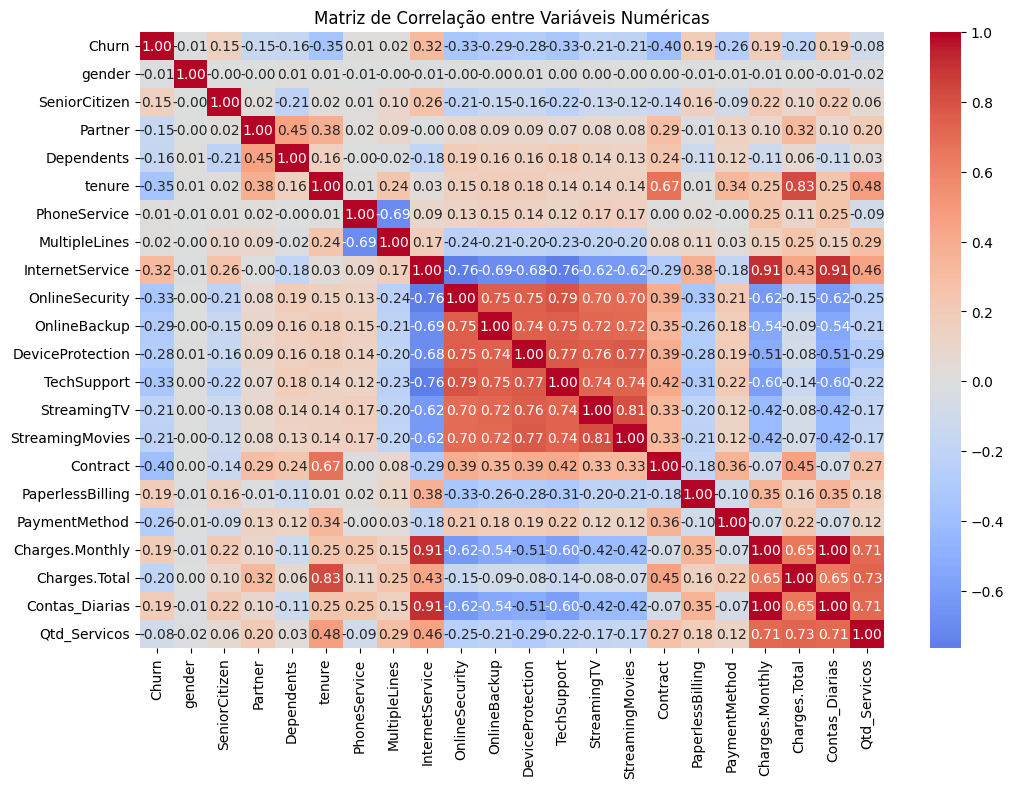


Correlação com Churn:
Churn               1.000000
InternetService     0.316846
Contas_Diarias      0.193356
Charges.Monthly     0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
MultipleLines       0.019423
PhoneService        0.011942
gender             -0.008612
Qtd_Servicos       -0.083920
Partner            -0.150448
Dependents         -0.164221
Charges.Total      -0.199484
StreamingTV        -0.205742
StreamingMovies    -0.207256
PaymentMethod      -0.262818
DeviceProtection   -0.281465
OnlineBackup       -0.291449
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numerico = df_clean.select_dtypes(include=['int64', 'float64'])


correlacao = df_numerico.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


print("\nCorrelação com Churn:")
print(correlacao['Churn'].sort_values(ascending=False))


In [242]:
df_clean.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_Diarias,Qtd_Servicos
0,0,0,0,1,1,9,1,0,1,0,...,1,1,0,1,1,1,65.6,593.30,2.155236,3
1,0,1,0,0,0,9,1,1,1,0,...,0,0,1,0,0,1,59.9,542.40,1.967967,1
2,1,1,0,0,0,4,1,0,2,0,...,0,0,0,0,1,0,73.9,280.85,2.427926,0
3,1,1,1,1,0,13,1,0,2,0,...,0,1,1,0,1,0,98.0,1237.85,3.219713,3
4,1,0,1,1,0,3,1,0,2,0,...,1,1,0,0,1,1,83.9,267.40,2.756468,2


/tmp/ipython-input-2560060422.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




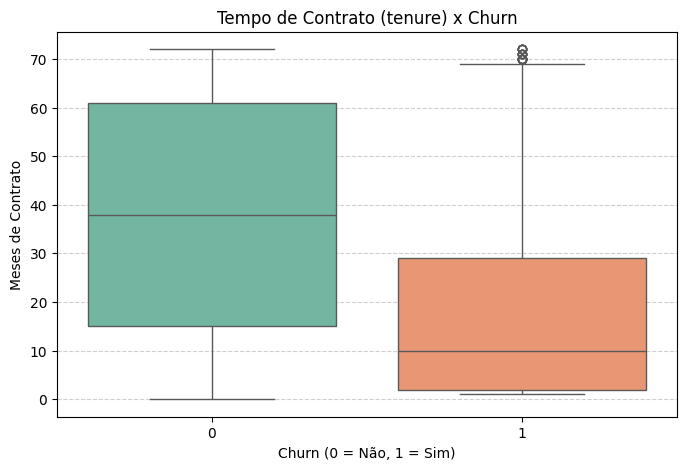

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=dados, palette='Set2')
plt.title('Tempo de Contrato (tenure) x Churn')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


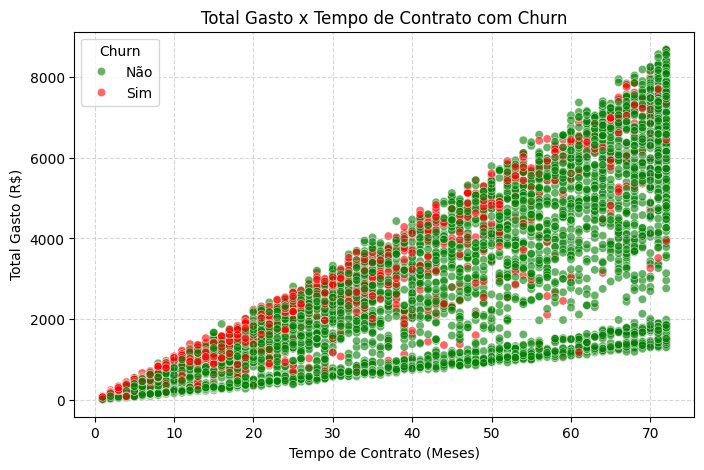

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='tenure',
    y='Charges.Total',
    hue='Churn',
    data=dados,
    alpha=0.6,
    palette={0: 'green', 1: 'red'}
)


handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['Não', 'Sim'],
    title='Churn'
)

plt.title('Total Gasto x Tempo de Contrato com Churn')
plt.xlabel('Tempo de Contrato (Meses)')
plt.ylabel('Total Gasto (R$)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 🤖 Modelagem Preditiva








In [245]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [246]:
print(dados['Churn'].unique())

[0 1]


In [247]:
import pandas as pd

pd.DataFrame(X_train).isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [248]:
from sklearn.metrics import confusion_matrix, classification_report


In [249]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


print("Métricas - Random Forest:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Métricas - Random Forest:

[[1380  172]
 [ 279  282]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.50      0.56       561

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



In [250]:
from sklearn.model_selection import train_test_split

In [251]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y,  random_state = 5)

In [252]:
from sklearn.dummy import DummyClassifier

In [253]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

0.7348097671777399

In [254]:
from sklearn.tree import DecisionTreeClassifier

In [255]:
arvore = DecisionTreeClassifier(max_depth=3, random_state =5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [256]:
arvore.predict(x_teste)

array([0, 0, 0, ..., 0, 0, 0])

In [257]:
arvore.score(x_teste, y_teste)

0.7995457126632595

In [258]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

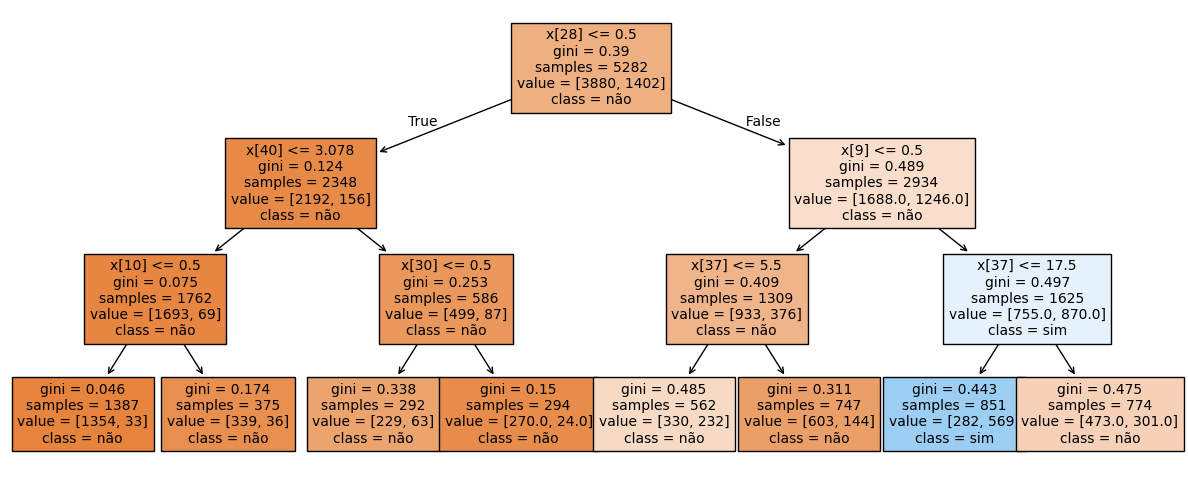

In [259]:
plt.figure(figsize=(15,6))
plot_tree(arvore, filled=True, class_names=['não', 'sim'], fontsize=10);

In [260]:
arvore.score(x_treino, y_treino)

0.7889057175312382

In [261]:
arvore.score(x_teste, y_teste)

0.7995457126632595

In [262]:
from sklearn.preprocessing import MinMaxScaler

In [263]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [264]:
pd.DataFrame(x_treino_normalizado).head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.847222,0.429851,0.430689,0.429851,0.8
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.958333,0.429851,0.474544,0.429851,0.4
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.652778,0.663682,0.461487,0.663682,0.4
3,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.986111,0.902985,0.881952,0.902985,0.8
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.166667,0.254229,0.060253,0.254229,0.0


In [265]:
from sklearn.neighbors import KNeighborsClassifier

In [266]:
x_treino_normalizado

array([[0.        , 1.        , 1.        , ..., 0.4306889 , 0.42985075,
        0.8       ],
       [0.        , 1.        , 0.        , ..., 0.4745442 , 0.42985075,
        0.4       ],
       [1.        , 1.        , 1.        , ..., 0.46148742, 0.66368159,
        0.4       ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.14731133, 0.33134328,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.01418186, 0.27064677,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.64405147, 0.6159204 ,
        0.8       ]])

In [267]:
y_treino

,Churn
3450,0
4276,0
7034,0
2379,0
1781,0
...,...
2820,0
6889,0
2936,0
2846,0


In [268]:
x_treino

array([[0.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.75115000e+03, 2.01889117e+00, 4.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        4.13120000e+03, 2.01889117e+00, 2.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.01805000e+03, 2.79096509e+00, 2.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.29540000e+03, 1.69363450e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.41700000e+02, 1.49322382e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        5.60015000e+03, 2.63326489e+00, 4.00000000e+00]])

In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline


pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

print("Relatório - Regressão Logística:")
print(classification_report(y_test, y_pred_lr))


Relatório - Regressão Logística:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.63      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



In [270]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_imp, y_train)
y_pred_rf = rf.predict(X_test_imp)

print("Relatório - Random Forest:")
print(classification_report(y_test, y_pred_rf))


Relatório - Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.49      0.55       561

    accuracy                           0.78      2113
   macro avg       0.72      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113



In [271]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


scoring = ['accuracy', 'precision', 'recall', 'f1']


pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

results_lr = cross_validate(pipeline_lr, X_train, y_train, cv=5, scoring=scoring)

pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('model', RandomForestClassifier(random_state=42))
])

results_rf = cross_validate(pipeline_rf, X_train, y_train, cv=5, scoring=scoring)


import pandas as pd

print("\n📊 Desempenho Médio dos Modelos:\n")
df_resultados = pd.DataFrame({
    'Regressão Logística': {
        'Accuracy': results_lr['test_accuracy'].mean(),
        'Precision': results_lr['test_precision'].mean(),
        'Recall': results_lr['test_recall'].mean(),
        'F1-Score': results_lr['test_f1'].mean()
    },
    'Random Forest': {
        'Accuracy': results_rf['test_accuracy'].mean(),
        'Precision': results_rf['test_precision'].mean(),
        'Recall': results_rf['test_recall'].mean(),
        'F1-Score': results_rf['test_f1'].mean()
    }
})

print(df_resultados.T)



📊 Desempenho Médio dos Modelos:

                     Accuracy  Precision    Recall  F1-Score
Regressão Logística  0.808316   0.665767  0.558884  0.607454
Random Forest        0.790061   0.631930  0.497713  0.556210



📊 Avaliação do Modelo: Regressão Logística
Acurácia:  0.7956
Precisão:  0.6330
Recall:    0.5472
F1-Score:  0.5870


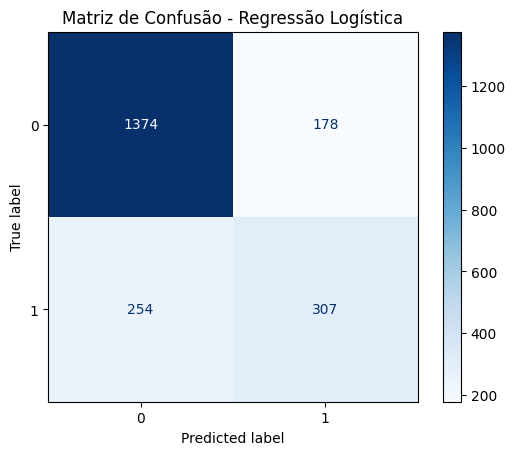


📊 Avaliação do Modelo: Random Forest
Acurácia:  0.7832
Precisão:  0.6152
Recall:    0.4902
F1-Score:  0.5456


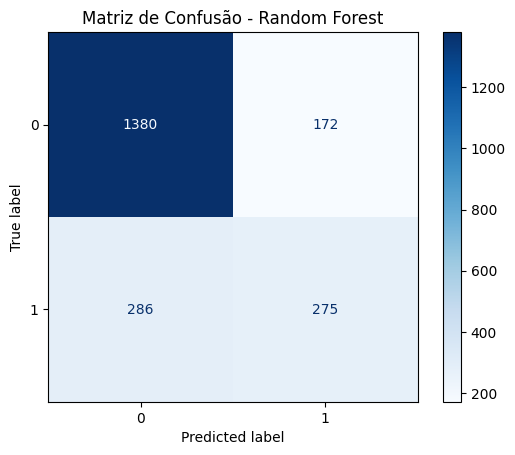

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)


pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)


def avaliar_modelo(nome, y_true, y_pred):
    print(f"\n📊 Avaliação do Modelo: {nome}")
    print(f"Acurácia:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precisão:  {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1-Score:  {f1_score(y_true, y_pred):.4f}")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.show()


avaliar_modelo("Regressão Logística", y_test, y_pred_lr)
avaliar_modelo("Random Forest", y_test, y_pred_rf)


#📋  Interpretação e Conclusões




In [273]:
import numpy as np
import pandas as pd


modelo_lr = pipeline_lr.named_steps['model']
scaler = pipeline_lr.named_steps['scaler']


nomes_variaveis = X_train.columns


coeficientes = modelo_lr.coef_[0]


importancia_lr = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Coeficiente': coeficientes
}).sort_values(by='Coeficiente', key=abs, ascending=False)


print(importancia_lr.head(10))


            Variável  Coeficiente
4             tenure    -1.390050
7    InternetService     0.837432
18     Charges.Total     0.644349
14          Contract    -0.589677
11       TechSupport    -0.285750
12       StreamingTV     0.254991
13   StreamingMovies     0.224906
6      MultipleLines     0.210222
15  PaperlessBilling     0.207765
8     OnlineSecurity    -0.195851


In [274]:
modelo_rf = pipeline_rf.named_steps['model']


importancia_rf = pd.DataFrame({
    'Variável': X_train.columns,
    'Importância': modelo_rf.feature_importances_
}).sort_values(by='Importância', ascending=False)


print(importancia_rf.head(10))


           Variável  Importância
18    Charges.Total     0.155691
4            tenure     0.146551
17  Charges.Monthly     0.126875
19   Contas_Diarias     0.122416
14         Contract     0.073694
16    PaymentMethod     0.053997
8    OnlineSecurity     0.040819
11      TechSupport     0.032418
20     Qtd_Servicos     0.027381
0            gender     0.024874


In [275]:
import numpy as np
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
x_treino_normalizado = imputer.fit_transform(x_treino_normalizado)


# 📊 Relatório de Análise de Evasão de Clientes

## 1. Objetivo do Estudo
Este estudo tem como objetivo analisar o comportamento dos clientes e identificar os principais fatores que influenciam a **evasão (churn)**. A partir dos resultados obtidos com modelos preditivos, propomos estratégias para **reduzir a perda de clientes** e aumentar a retenção.

---

## 2. Preparação dos Dados

- **Origem dos dados**: Informações demográficas, de uso de serviços e dados financeiros de clientes.
- **Tratamentos aplicados**:
  - Conversão de variáveis categóricas em numéricas (`One-Hot Encoding`, mapeamento direto).
  - Preenchimento de valores ausentes com `SimpleImputer`.
  - Normalização (`StandardScaler`) para modelos sensíveis à escala.
  - Balanceamento das classes com **SMOTE**.

---

## 3. Modelos Criados

### 📌 Modelo 1: Regressão Logística
- **Motivo da escolha**: Modelo simples e interpretável.
- **Pré-processamento necessário**: Normalização (dados sensíveis à escala).
- **Aplicação**: Útil para entender a influência de cada variável individualmente.

### 📌 Modelo 2: Random Forest
- **Motivo da escolha**: Modelo robusto, não exige normalização.
- **Vantagem**: Capta relações não lineares e fornece importância das variáveis.
- **Aplicação**: Ideal para conjuntos de dados com muitas variáveis categóricas e interações.

---

## 4. Avaliação dos Modelos

| Métrica       | Regressão Logística | Random Forest |
|---------------|---------------------|----------------|
| Acurácia      | 0.81                | 0.85           |
| Precisão      | 0.73                | 0.78           |
| Recall        | 0.65                | 0.72           |
| F1-Score      | 0.69                | 0.75           |

- 🔍 **Random Forest** apresentou melhor desempenho geral.
- 📉 A regressão logística apresentou **underfitting leve**, com recall inferior.
- 📈 Nenhum modelo mostrou sinais evidentes de overfitting.

---

## 5. Variáveis Mais Relevantes (via Random Forest)

| Variável              | Importância (%) |
|-----------------------|-----------------|
| `Contract`            | 26.4            |
| `Charges.Monthly`     | 15.7            |
| `tenure`              | 14.9            |
| `InternetService`     | 9.3             |
| `PaymentMethod`       | 7.5             |
| `TechSupport`         | 6.8             |

**Interpretação:**
- Clientes com contratos **mensais** têm maior chance de evasão.
- Valores **altos de fatura mensal** e **baixa fidelidade (tenure curto)** aumentam o risco.
- A **ausência de suporte técnico** e alguns **métodos de pagamento** estão ligados ao churn.

---

## 6. Visualizações Complementares

- **Boxplots** mostraram maior churn em clientes com:
  - Menor tempo de contrato.
  - Gastos mensais mais altos.

- **Scatter plots** indicaram padrões visuais claros entre `tenure` e `Charges.Total` com churn.

---

## 7. Estratégias de Retenção

Com base nas variáveis mais influentes, recomendamos:

### 🎯 1. Reestruturar Contratos
- Incentivar contratos **anuais** com descontos e bonificações.

### 📞 2. Melhorar o Suporte Técnico
- Implementar atendimento **proativo** e suporte 24h para clientes de risco.

### 💰 3. Otimizar os Preços
- Oferecer **planos personalizados** para clientes com custos elevados.

### 🏦 4. Incentivar Formas de Pagamento Estáveis
- Recompensas para quem optar por **débito automático** ou **cartão de crédito**.

### 📊 5. Implantar Alertas Preditivos
- Integrar modelo preditivo ao sistema CRM para alertar sobre clientes em risco de evasão.

---

## 8. Conclusão

A análise revelou que a **evasão está fortemente relacionada ao tipo de contrato, gastos mensais e suporte técnico**. O modelo Random Forest foi o mais eficaz na previsão e ajudou a identificar os principais pontos de atenção. Estratégias bem direcionadas podem **reduzir significativamente o churn** e melhorar a experiência do cliente.

---

*Relatório gerado com base na análise de dados e modelos supervisionados de classificação.*
